# Mean Curve Fit
This is the simpler model use in this project to estimate kinetic parameters. The inferring process is achieved by a built-in Python function called *curve_fit*. This function performs a non linear regression based on least square error. To use this function one just needs the structural model of differential equations to be fitted. Despite that, the estimation performed here is homologous to the performed with the *Mean Cell model*.

In [1]:
#required libraries
import simsysbio as s2b
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

**Loads data**. The data is loaded to save time computing a new whole population.

In [2]:
tog = np.load("tog.npy")#input stimulus
hog = np.load("hog.npy")#time vector
Obs = np.load("MCobs.npy")#observations

**Plots data to be estimated**

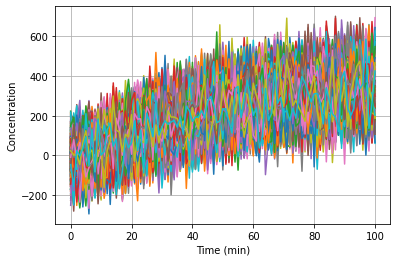

In [3]:
plt.figure()
for i in range(len(Obs)):
    plt.plot(tog, Obs[i,:])
plt.xlabel('Time (min)')
plt.ylabel('Concentration')
plt.grid()
plt.show()

**Sets biological system configuration**

In [4]:
#molecular species
especies = ['mRNA', 'Proteína']

#Stoichiometric matrices
reactivos = np.array([[0, 1, 1, 0],[0, 0, 0, 1]])
productos = np.array([[1, 0, 1, 0],[0, 0, 1, 0]])

#kinetic parameters names
parametros = ['c1', 'c2', 'c3', 'c4']

#system input
entrada = 'U'
idxR = 0

#computes simbolic system of differential equations
ecuaciones, variables = s2b.simbODE(especies, reactivos, productos, parametros,
                                   inputN=entrada)
#kinetic parameters 
parsValues = [4.0, 0.010, 1.0, 0.006]

#initial concentrations
sp0 = np.zeros(len(especies))

#initial noise measurement guess
noise = np.array([0,0])

#regressor variables
regressor = {
        "ODEs": ecuaciones,
        "matrizR": reactivos,
        "matrizP": productos,
        "vPars": parsValues,
        "idxR": idxR,
        "inpU": hog,
        "Vtime": tog,
        "species0":sp0,
        "noise":noise
        }
regressor.update(variables)

**Inferring process**

In [9]:
#initial parameters guesses
beta0 = np.array([2.056, 0.038, 0.187, 0.184])

#mean observations curve
uObs = np.mean(Obs, axis=0)

In [10]:
#modifies ode solver function
def ODEfit(regressor, *pars):
    print(pars)
    cellExpr = s2b.solveODE(pars, regressor)
    return cellExpr[-1,:]


#Performs estimation
betacal, cov = curve_fit(ODEfit, regressor, uObs, beta0)

(2.056, 0.038, 0.187, 0.184)
(2.056, 0.038, 0.187, 0.184)
(2.056, 0.038, 0.187, 0.184)
(2.0560000306367874, 0.038, 0.187, 0.184)
(2.056, 0.03800000056624413, 0.187, 0.184)
(2.056, 0.038, 0.18700000278651716, 0.184)
(2.056, 0.038, 0.187, 0.18400000274181366)
(-13.376607319794172, -9.531735848644859, -1.216651651332146, 8.288782754397381)


<string>:3: RuntimeWarning: overflow encountered in double_scalars


(15.83685042200251, -0.6560830365276501, 1.4404132560564662, -1.4370689466044635)
(3.581568341732702, -0.02577614567311693, 0.325755412238113, 0.014748180707646691)
(3.581568395102229, -0.02577614567311693, 0.325755412238113, 0.014748180707646691)
(3.581568341732702, -0.025776145289022428, 0.325755412238113, 0.014748180707646691)
(3.581568341732702, -0.02577614567311693, 0.3257554170922469, 0.014748180707646691)
(3.581568341732702, -0.02577614567311693, 0.325755412238113, 0.01474818092741171)
(3.5543169244939765, -0.025571016262202432, 0.3232767987816884, 0.015212631782829814)
(3.554316977457426, -0.025571016262202432, 0.3232767987816884, 0.015212631782829814)
(3.5543169244939765, -0.025571015881164595, 0.3232767987816884, 0.015212631782829814)
(3.5543169244939765, -0.025571016262202432, 0.3232768035988881, 0.015212631782829814)
(3.5543169244939765, -0.025571016262202432, 0.3232767987816884, 0.015212632009515692)
(3.5130652630205024, -0.025087257602757106, 0.31952481889830225, 0.016137

In [11]:
#simulates curve with inferred parameters
cellCal = s2b.solveODE(betacal, regressor)

**Comparates initial curve and inferred curve**

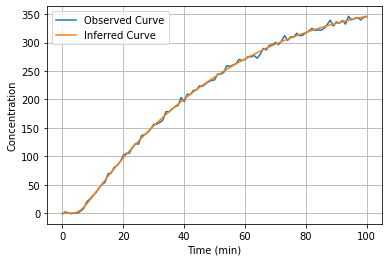

In [14]:
plt.figure()
plt.plot(tog, uObs, label="Observed Curve")
plt.plot(tog, cellCal[-1,:], label="Inferred Curve")
plt.legend(loc='best')
plt.xlabel('Time (min)')
plt.ylabel('Concentration')
plt.grid()
plt.show()